# Bertrand's Paradox

Here is the definition of the problem as phrased on [Wikipedia][1]:

 > Consider an equilateral triangle inscribed in a circle. Suppose a chord of the circle is chosen at random. What is the probability that the chord is longer than a side of the triangle?

[1]: https://en.wikipedia.org/wiki/Bertrand_paradox_(probability)

The question is easy to visualize and might appear well-posed at first. For example, in the figure below, the green chord is longer that the side of the inscribed equilateral triangle, while the blue one is shorter. If one were to draw chords at random, what fraction of them would end up being longer than the side of the triangle?

In [4]:
R = 1 # radius of circle

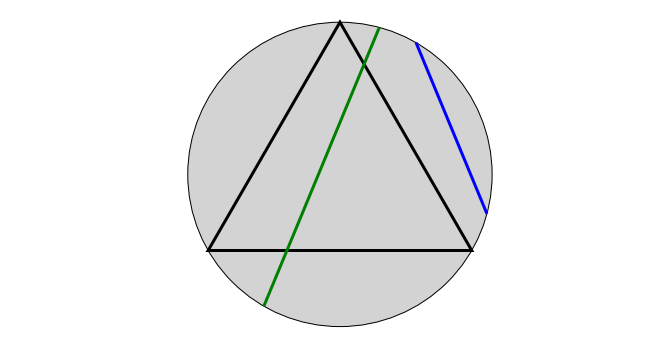

In [5]:
# example plot
fig = plt.figure(figsize=(12,6)); ax = fig.add_subplot(1,1,1)
ax.set(xlim = (-2*R, 2*R), ylim = (-R - 0.1, R + 0.1), aspect = 1)
_tmp = ax.axis('off')

# circle
_tmp = ax.add_patch(patches.Circle((0,0), radius = R, fc = 'lightgrey', lw = 1))
# equilateral triangle inscribed to circle 
_tmp = ax.add_patch(patches.RegularPolygon((0,0), 3, R, lw = 3, fill = False))
# add two chords, one shorter & one longer than triangle's side
_tmp = add_chord(ax, R, np.pi/3, -np.pi/12, "blue", 3)
_tmp = add_chord(ax, R, 5*np.pi/12, -2*np.pi/3, "green", 3)

Let us stress here that the circle is considered fixed before the chord is drawn -- i.e. it is the chord that is drawn at random, not the circle.
Without loss of generality, we consider the circle with center $c = (0,0)$ and radius R = 1.

The problem might appear to be one of tedious calculation until one realizes that the answer might depend on *how exactly* a chord is chosen 'at random'. The 'paradox' in this problem is that different ways to choose a chord lead to different results. Bertrand considered three different methods to produce the random chords and obtained three different solutions.

We explore them below. Note that what follows uses simulations to explore what can also be shown mathematically -- for a mathematical treatment of the problem, *see E.T. Jaynes, "The well-posed problem", 1973*.

In [6]:
N = 100000 # number of simulations
triangle_edge_length = get_triangle_side_length(R)  # side length of the inscribed equilateral triangle  

## Solution A - The "random endpoints" method

The first method is the following.
> "Choose two random points on the circumference of the circle and draw the chord joining them".

This is equivalent to selecting two random points $a$ and $b$ from the interval $[0, 2\pi)$. Given the center $c$ and radius $R$ of the circle, it is then straightforward to map $a$ and $b$ to two points on the circumference of the circle, calculate their cartesian coordinates and find the length of the chord they form.

For the purposes of simulation, we repeat the above process $N = 100,000$ times.

In [7]:
# each of the two endpoints of a single chord is
# defined by a (random) angle in [0, 2\pi)
end_a = 2 * np.pi * np.random.rand(N) # first
end_b = 2 * np.pi * np.random.rand(N)

# the cartesian (2d) coordinates for each endpoint
sol_A_coord_a = [(R*np.cos(theta), R*np.sin(theta)) for theta in end_a] # first endpoint
sol_A_coord_b = [(R*np.cos(theta), R*np.sin(theta)) for theta in end_b] # second endpoint

# the length of each chord
lengths = l2dist(sol_A_coord_a, sol_A_coord_b)

solution_A_pct = 100*sum(lengths > triangle_edge_length) / N

From simulation we find that $1/3$ of chords drawn with this method are longer than the side of the triangle. The plots below show: (i) the distribution of lengths of the randomly drawn chords, (ii) some of the drawn chords. The vertical line marks the length of the edge of the triangle.

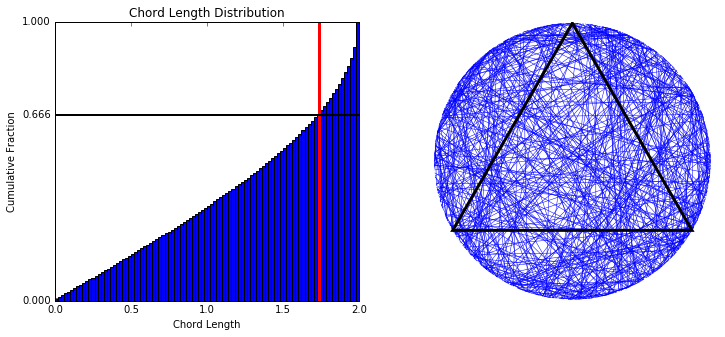

In [8]:
plot_length_distr_and_chords(lengths, R, solution_A_pct,
        triangle_edge_length, sol_A_coord_a, sol_A_coord_b, N)

## Solution B - The "random radius" method

The second method proceeds differently.
> "Choose a radius of the circle, choose a point on the radius and construct the chord through this point and perpendicular to the radius."

Selecting a radius of the circle is equivalent to selecting a random point $\phi \in [0, 2\pi)$. Moreover, selecting a random point on the radius is equivalent to selecting a random point $p \in [0, R)$. Given $\phi$ and $p$, it is straighforward to obtain the cartesian coordinates for the two endpoints $a$ and $b$ of the constructed chord.



In [9]:
phi = 2 * np.pi * np.random.rand(N) # choose random radius
point = R * np.random.rand(N) # choose random point on radius

# for the radius at \phi = 0, the two endpoints are positioned at
# angles +/- arccos(p/R)
absolute_angles = np.array([(np.arccos(p/R)) for p in point])

# selecting a radius at \phi, simply rotates the angles of
# endpoints by \phi, i.e. the two endpoints are
# positioned at phi +/- arccos(p/R)
sol_B_coord_a = [(R*np.cos(theta), R*np.sin(theta)) for theta in phi + absolute_angles]
sol_B_coord_b = [(R*np.cos(theta), R*np.sin(theta)) for theta in phi - absolute_angles]

# calculate the length of the constructed chord
lengths = l2dist(sol_B_coord_a, sol_B_coord_b)

solution_B_pct = 100*sum(lengths > triangle_edge_length)/N

From simulation we find that $1/2$ of constructed chords are longer than the side of the triangle. The plots below show: (i) the distribution of lengths of the randomly drawn chords, (ii) some of the drawn chords.

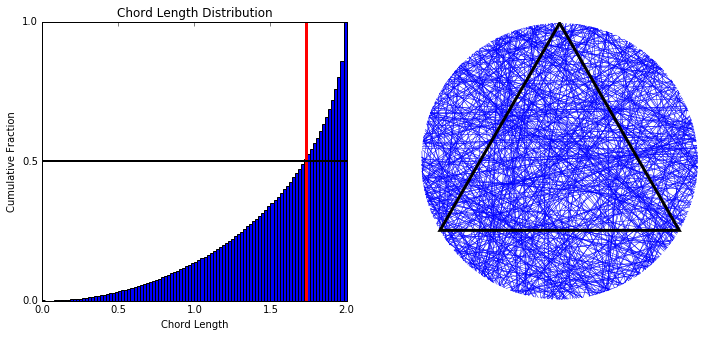

In [10]:
plot_length_distr_and_chords(lengths, R, solution_B_pct,
        triangle_edge_length, sol_B_coord_a, sol_B_coord_b, N)

## Solution C - The "random midpoint" method
We saw that the first method constructed chords by selecting random pairs of points from the circumference of the circle, while the second method selected random points from a radius of the circle. By contrast, this method proceeds by selecting random points from the *surface* within the circle (i.e., the chances that an area will incude one selected random point are proportional to its surface). Specifically, to follow this method,
> "Choose a point anywhere within the circle and construct a chord with the chosen point as its midpoint."

Suppose we have selected a midpoint with the aforementioned method; let $r$ be its distance from the centre $c = (0,0)$ of the circle, and $s=s(r)$ be the surface enclosed in the 'small' circle with center $c$ and radius $r$. 

Consider a newly drawn midpoint with distance $r'$ from center $c$. Observe that the probability that $r' < r$ is equal to $\pi r^2 / \pi R^2 = (r/R)^2$.

From the above observation, it is easy to see that selecting the midpoint is equivavalent to following these steps:

1. select a random point $p \in [0,1)$,
2. select the circle with center $c = (0,0)$ and radius $r = R * \sqrt{p}$,
3. select a random point $m$ from its circumference (equivalently, select random $\phi \in [0, 2\pi)$,
* use $m$ as the method's midpoint.

Given $r$ and $\phi$ associated with the selected midpoint, it easy to calculate the cartesian coordinate of the two endpoints $a$ and $b$ of the constructed chord.

In [11]:
R_sq = np.square(R)

# pick midpoint so that
# midpoints are picked uniformly at random
# across the area inside the circle
mid_radius = R * np.sqrt(np.random.rand(N))
mid_phi = 2 * np.pi * np.random.rand(N)

# the cartesian coordinates of midpoint
mid_x = [mid_radius[i] * np.cos(mid_phi[i]) for i in range(N)]
mid_y = [mid_radius[i] * np.sin(mid_phi[i]) for i in range(N)]

mid_y_square = np.square(mid_radius)

lengths = 2 * np.sqrt(R_sq - mid_y_square)

angle_a = mid_phi + np.arccos(mid_radius/R) # angle of first endpoint
angle_b = mid_phi - np.arccos(mid_radius/R) # angle of second endpoit

x_of_a = R*np.cos(angle_a) 
y_of_a = R*np.sin(angle_a) 
sol_C_coord_a = list(zip(x_of_a, y_of_a))

x_of_b = R*np.cos(angle_b)
y_of_b = R*np.sin(angle_b)
sol_C_coord_b = list(zip(x_of_b, y_of_b))

solution_C_pct = 100*sum(lengths > triangle_edge_length)/N

Simulation shows that $1/4$ of generated chords are longer than the side of the inscribed triangle. The plots below show (i) the distribution of the lengths of constructed chords, and (ii) a sample of the constructed chords.

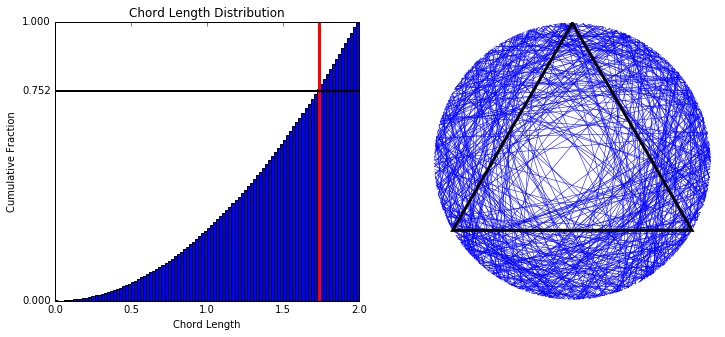

In [12]:
plot_length_distr_and_chords(lengths, R, solution_C_pct,
        triangle_edge_length, sol_C_coord_a, sol_C_coord_b, N)

## What solution to adopt?

It should now be obvious that different ways to produce the 'random' chords lead to different answers to the problem.
Moreover, it's up to our imagination to come up with other ways, simple or elaborate ones, to construct the chords.
As an example, for the following method to construct a chord (let's call it **method D**), the answer to the problem is $100\%$.
> Choose the chord that coincides with the diamemeter that forms a random angle $\phi \in [0, \pi)$ with the x-axis.



One might argue then that, unless the method that generates the random chords is specified, the problem is not well-posed. On the other hand, in real life we don't always get to choose how the problems are posed. Suppose that we have to make a decision that depends on the problem in *abscence of such specification*. For example, consider the following decision problem:
> You play a game with one opponent:
* You draw a circle anywhere on the plane.
* Your opponent draws a chord on the circle. You are **not** told anything about how the chord is drawn. The chord is **not revealed** to you yet.
* You place a bet of $100$ dollars on one of the two outcomes: (A) the chord is longer that the side of the triangle, or (B) the chord is shorter than the side of the triangle.
* The chord is now revealed.
* If you lose your bet, you receive no money back. If you win the bet, you receive $300$ dollars in the event of (A), or $150$ dollars in the event of (B). 

Also if you choose not to place a bet or complain about the rules of the game, you die. In absence of any specification of how your opponent draws the chord, and assuming you want to make the decision that maximizes your gain of dollars (and stay alive), do you place your bet on (A) or (B)?

If you do the calculations, you'll see that having method A, B, or C specified as the method used for generating a chord would lead to different decisions. Do you have any reason to assume any one of the three methods to decide how you place your bet? Would you perform your calculations under the assumption of method $D$, that we just specified above?

***

There is a strong argument to place our bets while assuming method B is used to generate the random chord. Specifically,  method B differs from the other methods in that it is location and scale invariant. The argument for method B is then that, unless we have reason to believe that the chord that the distribution over the drawn chords depends on the location and size of the circle, then assuming method B is the only of the aforementioned methods that is consistent with that state of knowledge.

To demonstrate the argument above, we perform more simulations.

In [13]:
# small circle
r = 0.35 # radius
c_small = (0.6, 0.0) # center

Consider a small circle that is entirely contained in the original one -- e.g., here we choose as our small circle the one that is centered at $c' = (0.6, 0)$ and has radius $r = 0.35$. Take then a random chord of the original circle that intersects with the small circle, and consider the chord that it forms on the smaller circle. What are the chances that this smaller chord is longer than the side of an equilateral triangle inscribed on the small circle?

In [ ]:
sol_A_small_lengths = get_small_lengths(c_small, r, sol_A_coord_a, sol_A_coord_b)
sol_B_small_lengths = get_small_lengths(c_small, r, sol_B_coord_a, sol_B_coord_b)
sol_C_small_lengths = get_small_lengths(c_small, r, sol_C_coord_a, sol_C_coord_b)

small_triangle_edge_length = get_triangle_side_length(r)

sol_A_small_pct = 100 * sum(sol_A_small_lengths > small_triangle_edge_length) / len(sol_A_small_lengths)
sol_B_small_pct = 100 * sum(sol_B_small_lengths > small_triangle_edge_length) / len(sol_B_small_lengths)
sol_C_small_pct = 100 * sum(sol_C_small_lengths > small_triangle_edge_length) / len(sol_C_small_lengths)

Our simulations show that only for method B does the answer remain the same as the answer for the original circle.

In [ ]:
plot_chords_and_small_circle(c_small, r, R, N, sol_A_coord_a, sol_A_coord_b,
                                            sol_B_coord_a, sol_B_coord_b,
                                            sol_C_coord_a, sol_C_coord_b)

In [ ]:
plot_solution_for_small_vs_large(solution_A_pct, sol_A_small_pct,
        solution_B_pct, sol_B_small_pct, solution_C_pct, sol_C_small_pct)

You can experiment with more small circles by changing the parameters *c_small* and *r* above.

***

# Setup

Run the following before the main part.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
%matplotlib inline

In [3]:
%run bertrand_helpers.py